# ANALISIS DE LOS SALARIOS EN EL CONDADO DE MONTGOMERY

## SOBRE LOS DATOS

Información salarial anual que incluye el pago bruto y el pago de horas extras para todos los empleados activos y permanentes del condado de Montgomery, MD, pagados en el año calendario 2023. Este conjunto de datos es un candidato ideal para realizar análisis sobre las disparidades salariales, la relación entre departamento/división y salario, y la Distribución de salarios por género y niveles de grado.

Se pueden aplicar modelos estadísticos para predecir los salarios base en función de factores como el departamento, el grado y la duración del servicio. También podrían emplearse técnicas de aprendizaje automático para identificar patrones y anomalías en los datos salariales, como valores atípicos o casos de inequidad significativa.

Algunos análisis que se realizarán con este conjunto de datos pueden incluir:

- **Análisis de la brecha salarial de género:**
Un examen de las diferencias salariales entre géneros dentro de roles, grados y departamentos similares para identificar cualquier disparidad que deba abordarse.
- **Análisis salarial departamental:**
Análisis de la distribución de salarios entre diferentes departamentos y divisiones para comprender cómo varía la compensación dentro de la organización.
- **Impacto del pago de horas extras y longevidad:**
Evaluar cómo las horas extras y el pago de longevidad contribuyen a la compensación general de los empleados e identificar tendencias o patrones en estos pagos.

### Librerías

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns',None)

## Carga de los datos

In [6]:
# df = pd.read_csv('Employee_Salaries_montgomery.csv', sep = ',', na_values='#N/D')
df = pd.read_excel('Employee_Salaries_montgomery_.xlsx', index_col=None)

In [7]:
df

Department                                    Department_Name  \
0            ABS                          Alcohol Beverage Services   
1            ABS                          Alcohol Beverage Services   
2            ABS                          Alcohol Beverage Services   
3            ABS                          Alcohol Beverage Services   
4            ABS                          Alcohol Beverage Services   
...          ...                                                ...   
10286        TBS  Department of Technology and Enterprise Busine...   
10287        ZAH       Office of Zoning and Administrative Hearings   
10288        ZAH       Office of Zoning and Administrative Hearings   
10289        ZAH       Office of Zoning and Administrative Hearings   
10290        ZAH       Office of Zoning and Administrative Hearings   

                                                Division Gender   Base_Salary  \
0                                  ABS 85 Administration      M  1.847173e+09   
1                                  ABS 85 Administration      M  1.587049e+09   
2                                  ABS 85 Administration      F  1.571242e+09   
3                         ABS 85 Administrative Services      F  1.537402e+09   
4                         ABS 85 Administrative Services      F  1.537402e+09   
...                                                  ...    ...           ...   
10286  TBS 34 OSP Low Code Governance and Administration      M  1.925500e+04   
10287                                    ZAH 05 Director      F  1.925250e+04   
10288  ZAH 05 Office of Zoning and Administrative Hea...      F  1.825750e+04   
10289          ZAH 05 Zoning and Administrative Hearings      F  1.825750e+04   
10290          ZAH 05 Zoning and Administrative Hearings      F  1.114724e+04   

       Overtime_Pay  Longevity_Pay Grade  
0               0.0            0.0    M2  
1               0.0            0.0    M3  
2               0.0            0.0    M3  
3               0.0            0.0    21  
4               0.0            0.0    16  
...             ...            ...   ...  
10286           0.0            0.0   N28  
10287           0.0            0.0   NaN  
10288           0.0            0.0   N18  
10289           0.0            0.0   N21  
10290           0.0            0.0   N35  

[10291 rows x 8 columns]

### Verificación de los datos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


### Analisis de Nulos

In [11]:
df.isna().sum().sort_values(ascending = False)

Grade              33
Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
dtype: int64

para no eliminar la columna "Grade" procedemos a remplazar los datos null de "Grade" con la mediana

## EDA Datos Categóricos

In [14]:
# Aqui lo que hacemos es contar las variables categoricas
datos_categoricos = df.select_dtypes(include=object).nunique()

In [15]:
# miramos cual es la voriable que mas repite de los datos de la columna "Grade"
df['Grade'].value_counts()

Grade
T1     687
P4     683
16     656
24     561
F3     513
      ... 
T1P      1
N14      1
S1       1
EX0      1
N35      1
Name: count, Length: 98, dtype: int64

In [16]:
# Reemplazar los valores nulos por el valor mayor de los datos de "Grade"
# Pero principalmente debemos convertir los valores en string
df['Grade'] = df['Grade'].astype(str)

In [17]:
# Como los valores son string identifico los valores null llamados nan
    # para reemplazarlo por "T1"
df['Grade'] = df['Grade'].str.replace('nan', 'T1').astype(str)

### Gráfico de Barras

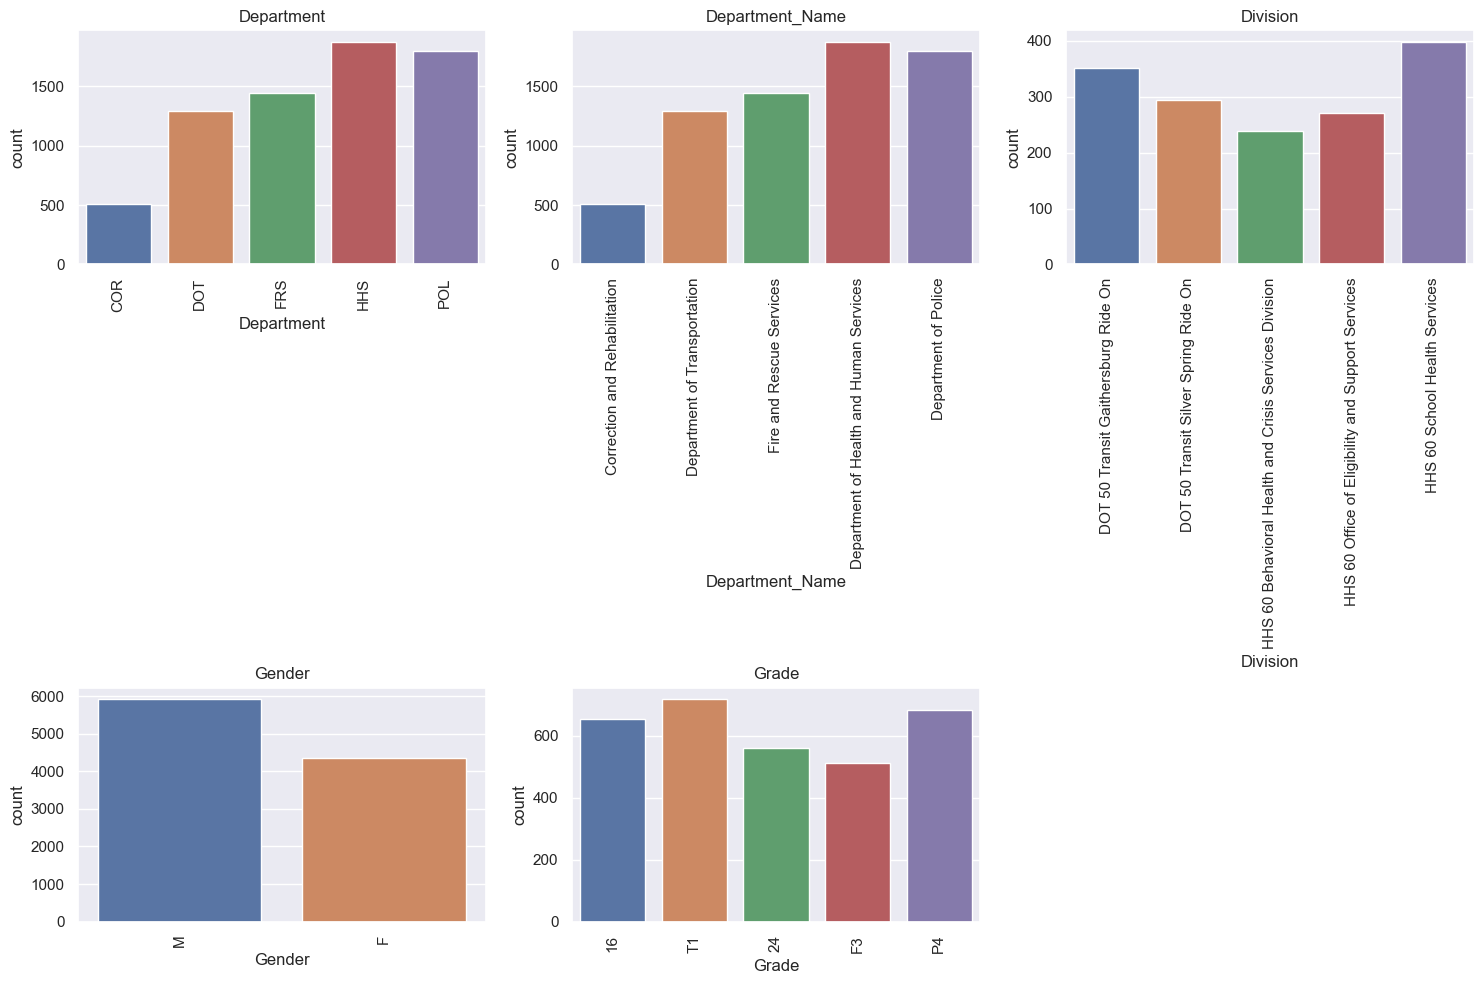

In [19]:
### EDA (Exploratory Data Analysis)

# Obtenga los nombres de todas las columnas con el tipo de datos 'objeto' (columnas categóricas)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Crear una figura con subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()


# Cree un diagrama de conteo para los 5 valores principales de cada variable categórica usando Seaborn
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(5).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params (axis="x", rotation=90)

# Elimine cualquier subtrama vacía adicional si es necesario
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
    
# Ajustar el espaciado entre los graficos
fig.tight_layout()   

# mostrar los graficos
plt.show()

### Gráfico de Torta

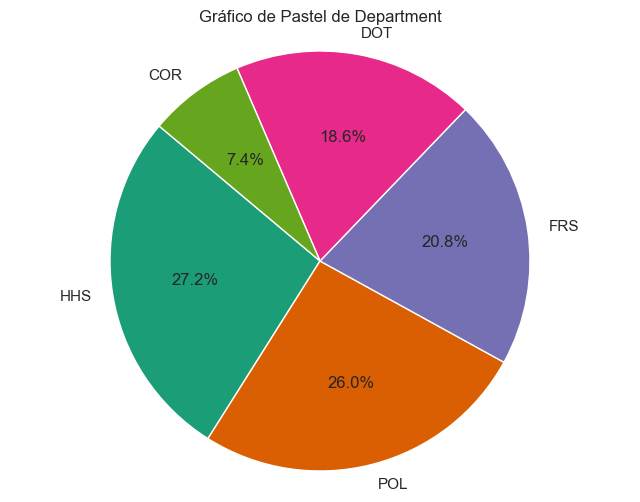

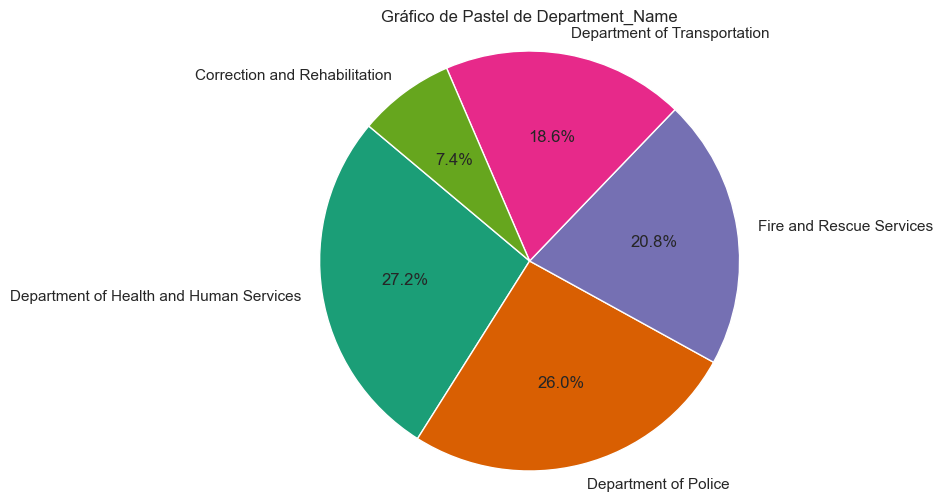

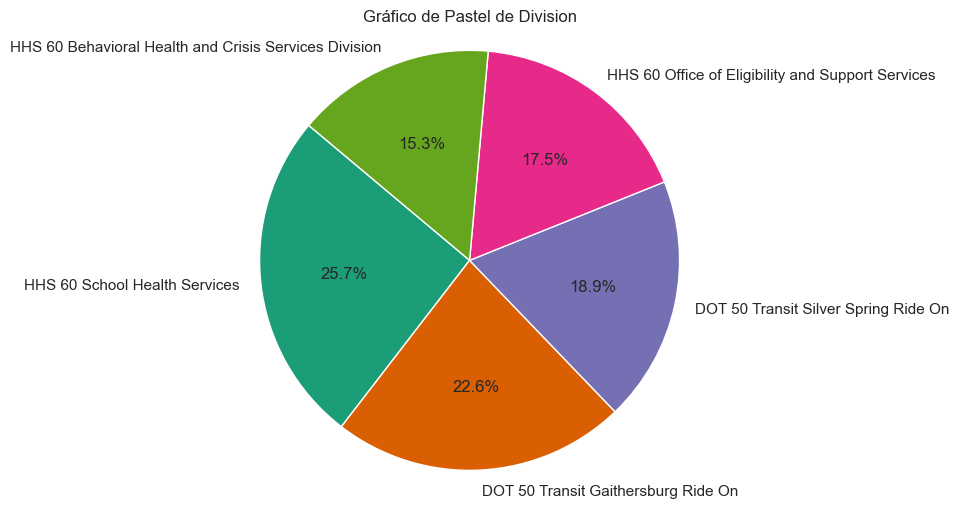

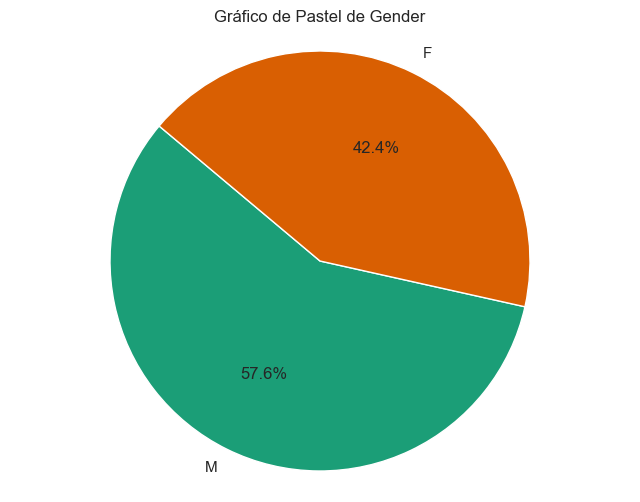

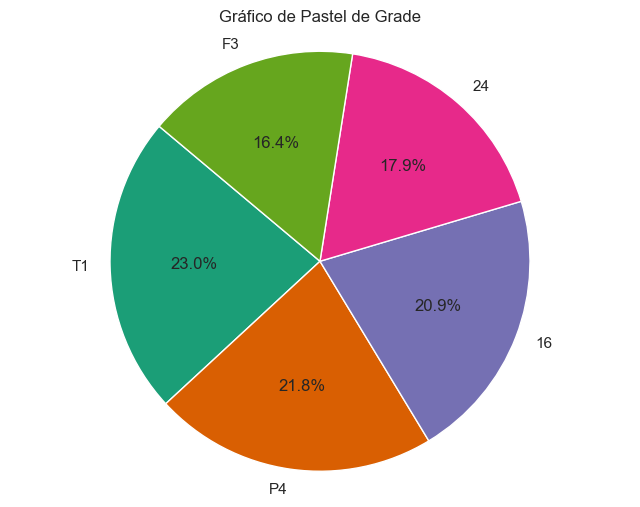

In [168]:
# Obtener los nombres de todas las columnas con datos de tipo "object"
cat_vars = df.select_dtypes(include=object).columns.tolist()

# Definir una paleta de colores personalizada
colors = sns.color_palette("Dark2")

# Crear un ciclo for que contenga los primeros 5 valores de cada variable categórica
for var in cat_vars:
    top_values = df[var].value_counts().nlargest(5).index
    filtered_df = df[df[var].isin(top_values)]
    
    # Calcular el conteo de cada valor en la variable categórica
    counts = filtered_df[var].value_counts()

    # Crear el gráfico de pastel utilizando Seaborn
    plt.figure(figsize=(8, 6))
    plt.title(f'Gráfico de Pastel de {var}')
    plt.pie(counts, labels=counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

**Conclusiones:**
- El departamento con más personas; es el de recursos humanos
- La división con más personas es la división de school healt services
- Hay más mujeres que hombres trabajando
- El grado más alto es el T1


## EDA datos numéricos

In [25]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [26]:
estadisticos_cont(df.select_dtypes('number'))

count          mean     median           std       min  \
Base_Salary    10291.0  1.434726e+08  104428.00  3.156560e+08  11147.24   
Overtime_Pay   10291.0  8.081289e+03     258.42  1.649183e+04      0.00   
Longevity_Pay  10291.0  1.533883e+03       0.00  3.209041e+03      0.00   

                   25%        50%         75%           max  
Base_Salary    78947.0  104428.00  159165.265  1.847173e+09  
Overtime_Pay       0.0     258.42    9190.970  2.274290e+05  
Longevity_Pay      0.0       0.00    1225.680  2.027946e+04

### Gráfico Boxplot

### Boxplot por Genero

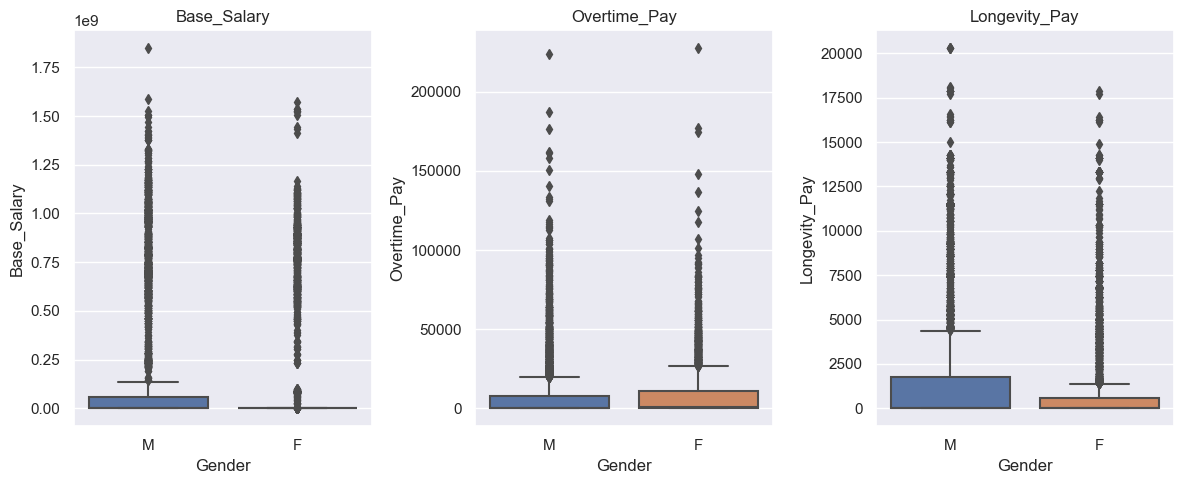

In [164]:
# Escogemos los nombre de todas las columnas con los datos 'int' "Numeros enteros"
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

#Crear las figuras/espacios para los graficos
num_cols = len(int_vars)
num_rows = (num_cols + 2)// 3 # Asegurate que son los espacios suficientes para todas las graficas
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, 5*num_rows))
axs = axs.flatten()

#crear un box-plot para cada varibles usando seaborn con hue='attritio'

for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='Gender', data=df , ax=axs[i])
    axs[i].set_title(var)
    
# Eliminar cada espacio extra que o hayan llenado los graficos
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
       fig.delaxes(axs[i])
      
# Ajustar los espacios de os graficos y los titulos
fig.tight_layout()

# mostrar el grafico
plt.show()

### Gráfico de Torta

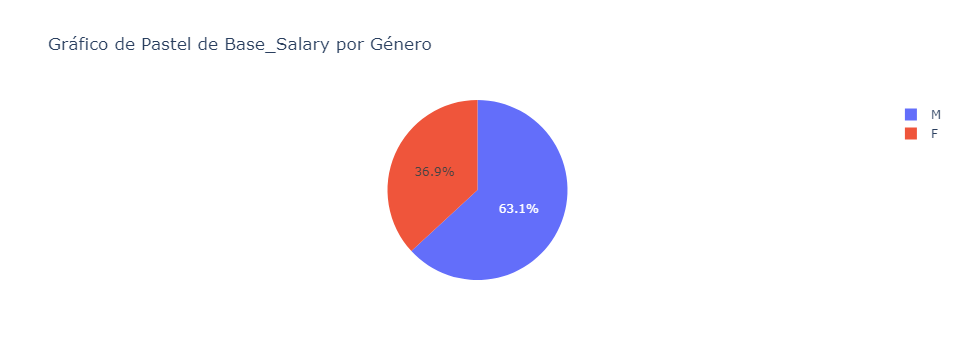

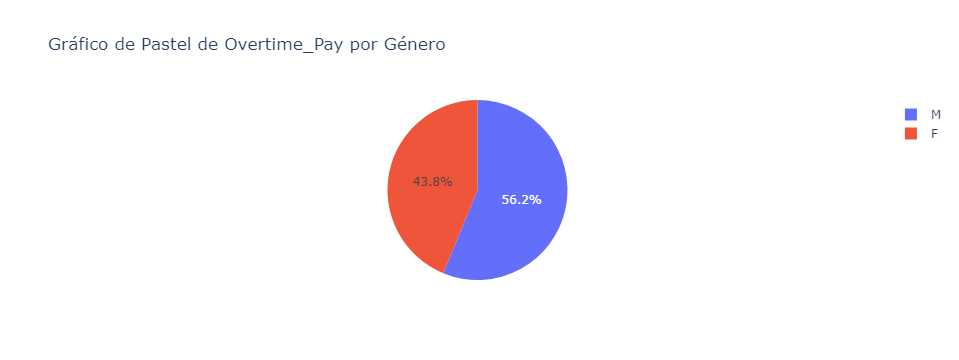

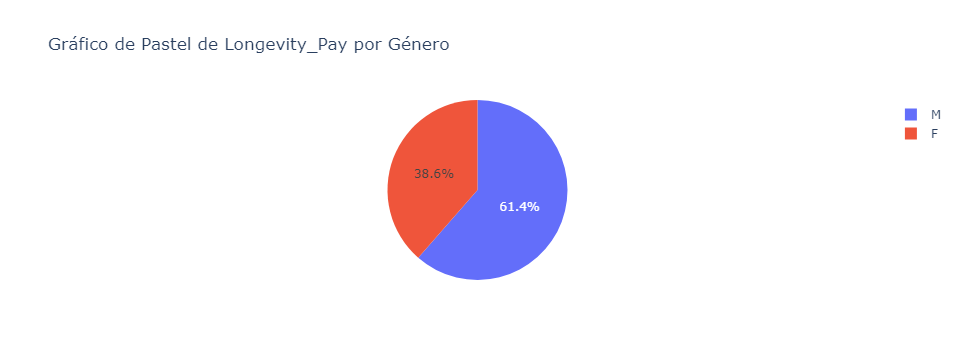

In [32]:
# Lista de variables numéricas
num_vars = ['Base_Salary', 'Overtime_Pay', 'Longevity_Pay']

# Iterar sobre las variables numéricas
for var in num_vars:
    # Calcular la suma de la variable numérica para cada categoría de género
    grouped_df = df.groupby('Gender')[var].value_counts().reset_index()

    # Crear el gráfico de pastel
    fig = px.pie(grouped_df, values=var, names='Gender', title=f'Gráfico de Pastel de {var} por Género')

    # Mostrar el gráfico
    fig.show()

array([[<Axes: title={'center': 'Base_Salary'}>,
        <Axes: title={'center': 'Overtime_Pay'}>],
       [<Axes: title={'center': 'Longevity_Pay'}>, <Axes: >]],
      dtype=object)

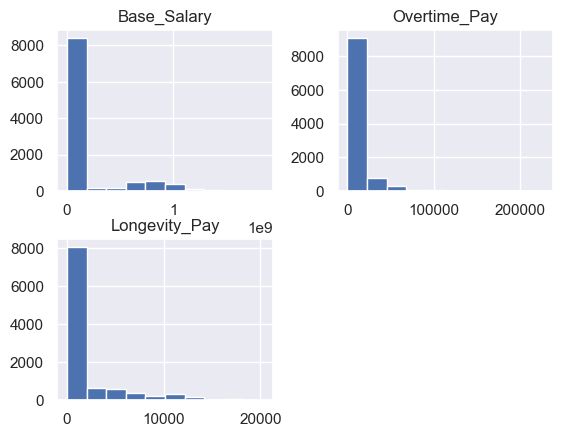

In [33]:
df.hist()

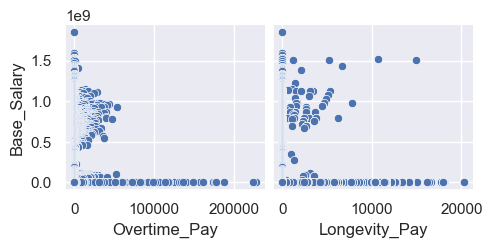

In [34]:
# Pairplot variables numéricas
sns.pairplot(df, x_vars=['Overtime_Pay','Longevity_Pay'], y_vars=['Base_Salary'])

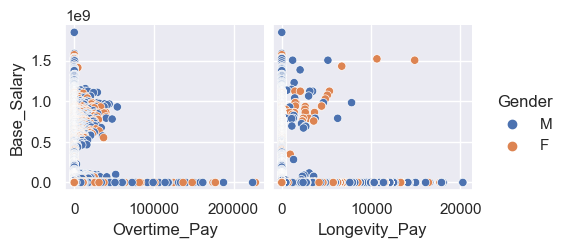

In [35]:
# Pairplot por genero
sns.pairplot(df, x_vars=['Overtime_Pay','Longevity_Pay'], y_vars=['Base_Salary'], hue='Gender')

## Generación de Insights

**1 Análisis de la brecha salarial de genero**
- ¿Existe diferencia salarial entre los géneros?
- ¿Existe diferencia de número de trabajadores por genero?

**2 Análisis salarial departamental**
- ¿Hay alguna diferencia entre los salarios por géneros dentro de los TOP 5 departamentos?
- ¿Qué cantidad de trabajadores por géneros hay entre los TOP 5 departamentos?
    
**3 Impacto del pago de horas extras y longevidad**
- ¿Existen correlaciones entre el salario base, longevidad y pagos extras?



### 1. Analisis de la brecha salarial de genero

#### 1.1 Existe diferencia salarial entre los generos?

         count          mean           std       min      25%       50%  \
Gender                                                                    
F       4362.0  1.237527e+08  2.949514e+08  11147.24  78947.0   90386.0   
M       5929.0  1.579807e+08  3.293316e+08  19255.00  78333.0  112267.0   

               75%           max  
Gender                            
F         117424.0  1.571242e+09  
M       56493405.0  1.847173e+09  


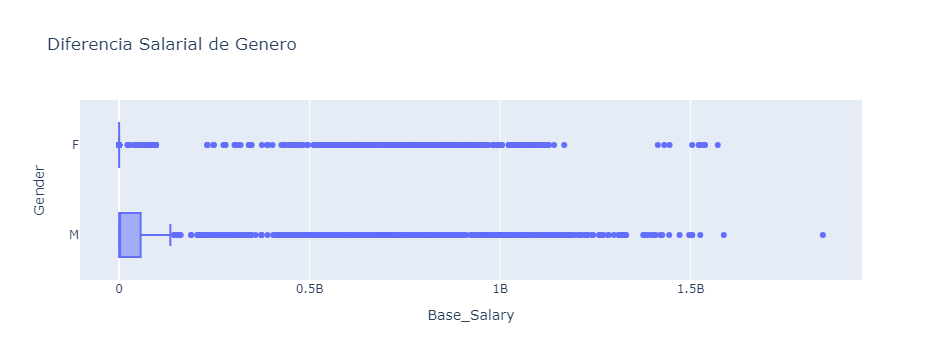

In [40]:
summary_stats = df.groupby('Gender')['Base_Salary'].describe()

# Mostrar el resumen estadístico
print(summary_stats)

# Crear un boxplor para ver la diferencia de salarioes entre generos
fig = px.box(df, x='Base_Salary', y='Gender', title='Diferencia Salarial de Genero')

fig.show()

**Conclusión:**

**Diferencias generales por género:**

El salario promedio de los hombres (M) es más alto que el de las mujeres (F). Las mujeres ganan en promedio un 21.7% menos que los hombres (1,579,807 - 1,237,527) / 1,579,807.
La mediana también muestra una brecha. Las mujeres ganan en la mediana un 19.5% menos que los hombres (112,267 - 90,386) / 112,267.

**Distribución de ingresos:**

La desviación estándar (std) es alta para ambos géneros, lo que indica una gran dispersión en los ingresos. Hay personas que ganan mucho más o menos que el promedio.
El salario mínimo (min) es similar para ambos géneros, lo que sugiere que la brecha salarial se amplía en los salarios más altos.
El percentil 75 (75%) también muestra una diferencia donde los hombres ganan más.

#### 1.2 Existe diferencia de numero de trabajadores por genero?

In [43]:
df.Gender.value_counts(normalize = True) * 100

Gender
M    57.613449
F    42.386551
Name: proportion, dtype: float64

### 2. Análisis salarial departamental

#### 2.1 Hay alguna diferencia entre los salarios por géneros dentro de los TOP 10 departamentos?

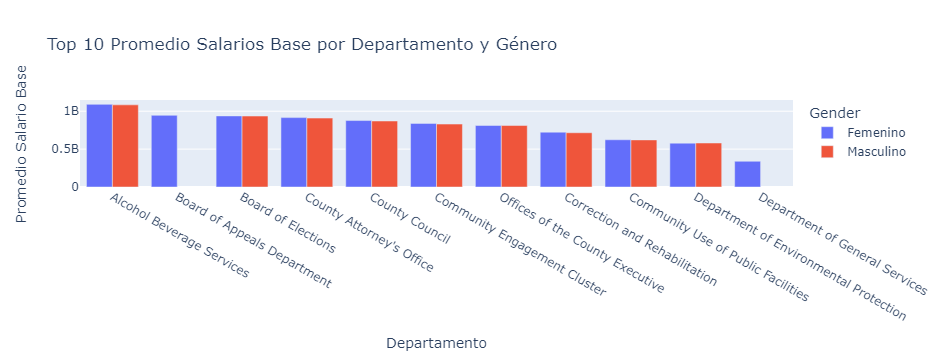

In [46]:
import plotly.express as px

# Calcular la suma de salarios base para cada género y departamento
salary_sum = df.groupby(['Department_Name', 'Gender'])['Base_Salary'].mean().reset_index()

# Ordenar los departamentos por salario base promedio en orden descendente
salary_sum_sorted = salary_sum.sort_values(by='Base_Salary', ascending=False)

# Tomar los top 10 departamentos
top_10_departments = salary_sum_sorted.head(20)

# Mapear los valores de género a sus correspondientes etiquetas
gender_labels = {'M': 'Masculino', 'F': 'Femenino'}
top_10_departments['Gender'] = top_10_departments['Gender'].map(gender_labels)


# Crear el gráfico de barras diferenciado por género y departamento
fig = px.bar(top_10_departments, x='Department_Name', y='Base_Salary', color='Gender', 
             barmode='group',
             labels={'Department_Name': 'Departamento', 'Base_Salary': 'Promedio Salario Base'},
             title='Top 10 Promedio Salarios Base por Departamento y Género')
fig.show()

**Conclusión:**

Según los top 10 departamentos en los que laboran las personas del condado de Montgomery las mujeres ganan más dinero que los hombres, recordemos que estos no son datos en general de todos los trabajos en el condado.

Incluso dentro de este top 10 podemos ver que en dos departamentos como lo son (Board of Appeals Department) y (Department of General Services) solo trabajando mujeres.


#### 2.2 Que numeros de trabajadores por generos hay entre los TOP 5 departamentos?

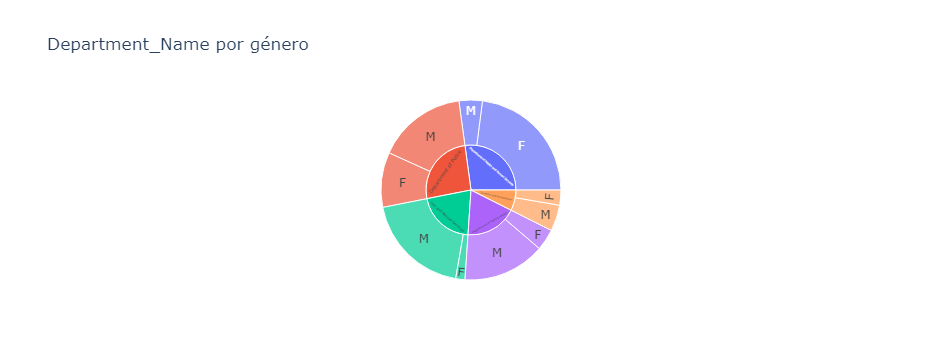

In [49]:
# Lista de variables categóricas de interés
cat_vars_of_interest = ['Department_Name']

# Iterar sobre cada una de las variables categóricas de interés
for var in cat_vars_of_interest:
    # Obtener las 5 principales categorías
    top_categories = df[var].value_counts().nlargest(5).index.tolist()
    # Filtrar el dataframe para incluir solo las 5 principales categorías
    filtered_df = df[df[var].isin(top_categories)]
    # Crear el gráfico de sunburst diferenciado por género
    fig = px.sunburst(filtered_df, path=[var, 'Gender'], title=f'{var} por género')
    fig.show()

**Conclusión:**

En este top 5 podemos identificar que algunos departamentos están segmentados por el género, como por ejemplo el de bomberos (Fire and Rescue Service) es normal pensar que por bilogía en fuerza el género masculino prime, de la misma forma pasa con el departamento de policía (Department of police). De igual forma ocurre en el Department health and human service) que existe mayor proporción de mujeres que hombres


### 3. Impacto del pago de horas extras y longevidad

#### 3.1 Existen correlaciones entre el salario base, longevidad y pagos extras?

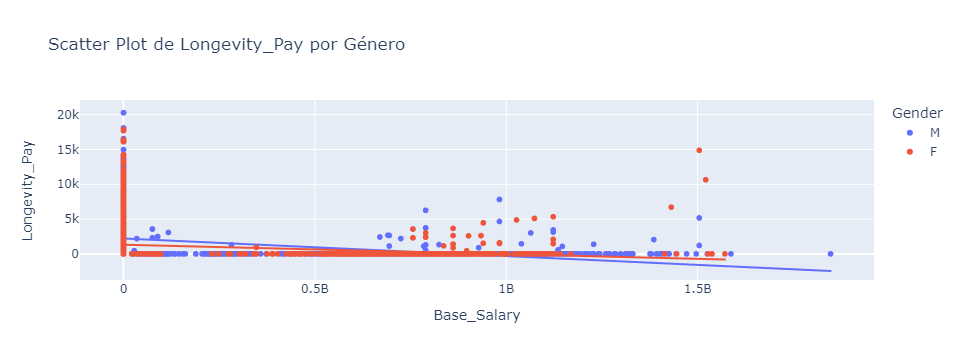

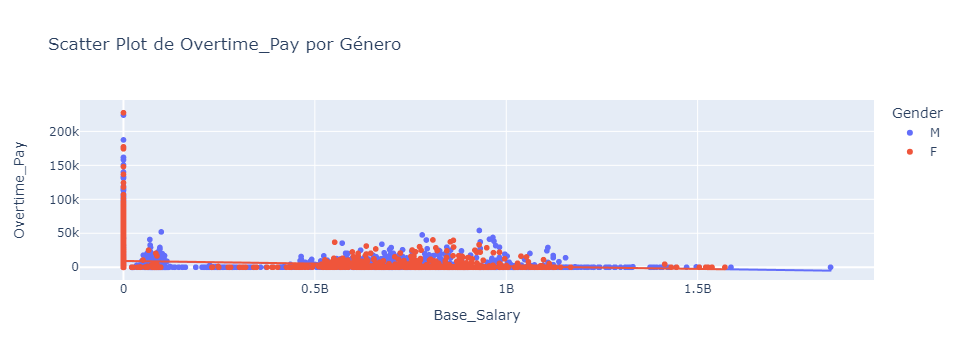

In [53]:
# Lista de variables numéricas
num_vars = ['Longevity_Pay', 'Overtime_Pay']

# Crear el scatter plot para cada variable numérica, diferenciando por género
for var in num_vars:
    fig = px.scatter(df, x='Base_Salary', y=var, color='Gender', trendline="ols", title=f'Scatter Plot de {var} por Género')
    fig.show()

**Conclusiones:**

No existe relación de los salarios base con los pagos extras y con los pagos de longevidad, lo unico que podemos visualizar en las raficas, es que para los hombers los numeros siguen siendo un poco mas grandes como para pagos por horas extras como de longevidad.



## Correlación Heatmap

### Codificación de los datos tipo objetos

In [57]:
# Crear una copia del dataframe original
df_encoded = df.copy()

# bucle sobre cada colummna en el dataframe donde el tipo de datos sea objeto
for col in df_encoded.select_dtypes(include=[object]).columns:

    # Imprimir el nombre de las columnas y los valores unicos
    print(f"{col}= {df_encoded[col].unique()}")

Department= ['ABS' 'BOA' 'BOE' 'CAT' 'CCL' 'CEC' 'CEX' 'COR' 'CUS' 'DEP' 'DGS' 'DHS'
 'DOT' 'DPS' 'ECM' 'FIN' 'FRS' 'HCA' 'HHS' 'HRC' 'IGR' 'LIB' 'MPB' 'NDA'
 'OAG' 'OAS' 'OCP' 'OFR' 'OGM' 'OHR' 'OIG' 'OLO' 'OLR' 'OMB' 'ORE' 'PIO'
 'POL' 'PRO' 'REC' 'SHF' 'TBS' 'ZAH']
Department_Name= ['Alcohol Beverage Services' 'Board of Appeals Department'
 'Board of Elections' "County Attorney's Office" 'County Council'
 'Community Engagement Cluster' 'Offices of the County Executive'
 'Correction and Rehabilitation' 'Community Use of Public Facilities'
 'Department of Environmental Protection' 'Department of General Services'
 'Office of Emergency Management and Homeland Security'
 'Department of Transportation' 'Department of Permitting Services'
 'Ethics Commission' 'Department of Finance' 'Fire and Rescue Services'
 'Department of Housing and Community Affairs'
 'Department of Health and Human Services' 'Office of Human Rights'
 'Office of Intergovernmental Relations Department'
 'Department of

In [58]:
# Continuamos con la codificación de los datos tipo objeto
from sklearn import preprocessing

# bucle sobre cada colummna en el dataframe donde el tipo de datos sea objeto
for col in df_encoded.select_dtypes(include=[object]).columns:
    
    # Iniciando la codificación de los datos tipo objeto
    label_encoder = preprocessing.LabelEncoder()
    
    # Ajustar la codificación a datos con valores unicos en la columna
    label_encoder.fit(df_encoded[col].unique())
    
    # Transformar la columna usando la codificación
    df_encoded[col] = label_encoder.transform(df_encoded[col])

    # Imprimir el nombre de la columna usando el valores codificados
    print(f"{col}= {df_encoded[col].unique()}")

Department= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Department_Name= [ 0  1  2  6  7  3 40  5  4  8 10 26 18 13 19  9 20 12 11 30 31 15 21 22
 23 24 25 27 28 29 39 33 32 34 37 36 14 35 16 41 17 38]
Division= [  0   1   3   4   5  24  26  43   6   7   8   9  10  11  14  12  13  15
  16  17  18  19  20  21  22  23  25  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42   2  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  74  66  67  68  69  70
  71  72  73  76  77  78  79  80  81  75  97  99 113 101 102 103  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96 104  98 100 120 105
 106 107 108 109 110 111 112 114 115 116 117 118 119 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 165 163 164 166 167 168 169 170 171 172 1

'#plotly\nfig = px.imshow(df_encoded.corr(), text_auto=True)\nfig.show()'

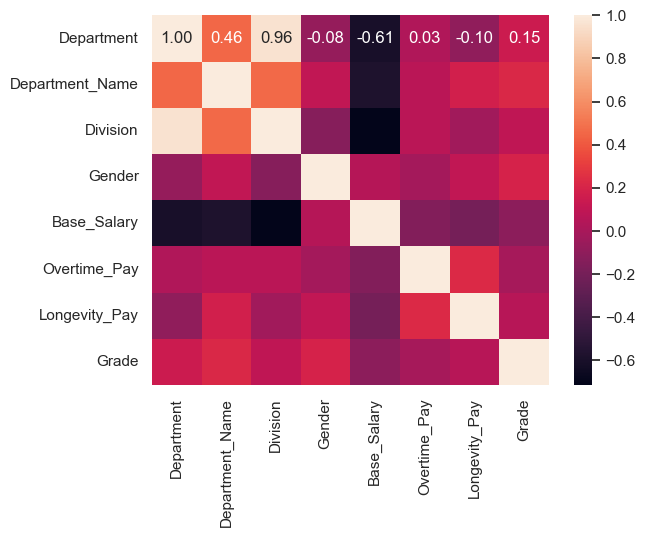

In [59]:
# Correlation HeatMap
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f")

"""#plotly
fig = px.imshow(df_encoded.corr(), text_auto=True)
fig.show()"""

**Conclusiones:**

Según el heatmap que explica las correlaciones de las variables podemos notar que las únicas correlaciones positivas que observamos son: 
- Departmen_Name & Department, que no lo debemos tener en cuenta porque department es el indicador de Department_Name.

- Departmen & Division, que explica que mientras existan mas departamentos, también será mayor el número de divisiones.

En el caso contrario las variables que demuestran correlaciones negativas son:

- Department & Base_Salary, el cual me parece muy extraño porque puede traducirse como que mientras más números de departamentos existan, el salario base disminuye para los trabajadores; podemos sacar análisis subjetivos de esta relación, como, por ejemplo, mientras más crece un departamento los costos por empleados puede disminuir, lo que llamaríamos como economías de escala. Así como también crecen los niveles de jerarquía en los trabajos y se dividan y estandaricen los salarios según el nivel de complejidad o de beneficio-costo.

- División & Department_Name, que explica básicamente lo mismo que mientras más cantidad de divisiones menos salarios base a los trabajadores, lo que afirma el punto de las economías de escala y de las jerarquías por divisiones o niveles.



## Modelos de Machine Learning

In [62]:
# Codificación de las variables categoricas

df_dt = df.copy()
from sklearn import preprocessing

# Bucle sobre las columnas categoricas
for col in df_dt.select_dtypes(include=[object]).columns:
    # Iniciando la codificación
    label_encoder = preprocessing.LabelEncoder()
    # Ajustar la codificación a valores unicos en la columna
    label_encoder.fit(df[col].unique())
    # Transformar las columnas usando la codificación
    df_dt[col] = label_encoder.transform(df[col])
    # Imprime las columnas categoricas para ver el resultado
    print(f'{col}= {df_dt[col].unique()}')

Department= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Department_Name= [ 0  1  2  6  7  3 40  5  4  8 10 26 18 13 19  9 20 12 11 30 31 15 21 22
 23 24 25 27 28 29 39 33 32 34 37 36 14 35 16 41 17 38]
Division= [  0   1   3   4   5  24  26  43   6   7   8   9  10  11  14  12  13  15
  16  17  18  19  20  21  22  23  25  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42   2  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  74  66  67  68  69  70
  71  72  73  76  77  78  79  80  81  75  97  99 113 101 102 103  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96 104  98 100 120 105
 106 107 108 109 110 111 112 114 115 116 117 118 119 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 165 163 164 166 167 168 169 170 171 172 1

### Entrenamiento

In [64]:
X = df_dt.drop(columns='Base_Salary')
y = df_dt['Base_Salary']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### Eliminar valores atípicos usando Z-score

In [66]:
from scipy import stats
# Definimos las columnas de las que queremos eliminar los valores atipicos
selected_columns = ["Department_Name","Division","Gender","Overtime_Pay","Longevity_Pay","Grade"] 

# Calcular el Z-scores para seleccionar las columnas del dato de entrenamiento
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Establecer un limite de valor para la detección de valores atipicos
limite = 3

# Encontrar los indices de los valores atipicos vasados en el limite
indices_atipicos = np.where(z_scores > limite)[0]

# Eliminar los valores atipicos de los datos de entrenamiento
X_train = X_train.drop(X_train.index[indices_atipicos])
y_train = y_train.drop(y_train.index[indices_atipicos])

### DecisionTreeRegressor

In [68]:
## Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [69]:
y_pred = dtree.predict(X_test)
y_pred

array([9.94306500e+04, 7.97948154e+08, 8.78102844e+04, ...,
       9.82280000e+04, 1.12267000e+05, 1.52108000e+05])

#### R cuadrado Score $$R^2$$ 

In [71]:
from sklearn.metrics import r2_score
score = r2_score(y_pred,y_test)
score

0.9967468608368275

#### Selección de Hiperparametros con GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV
# Selección de Hiperparametros
parameter={
    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "splitter": ['best', 'random'],
    "max_depth" : [100,200,300],
    "max_features" : ['auto', 'sqrt', 'log2']
}

In [74]:
# Realizar una búsqueda en cuadrícula con validación cruzada para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(dtree, param_grid= parameter, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [100, 200, 300],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [75]:
# Imprimir los mejores hipermparámetros
grid_search.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 100,
 'max_features': 'sqrt',
 'splitter': 'best'}

#### Nuevo entrenamiento con los parametros

In [77]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(criterion= "absolute_error", max_depth= 100, max_features= "log2", splitter= "best")
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=100,
                      max_features='log2')

#### Métricas de Regression

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("Error Cuadrático Medio:", (mean_squared_error(y_test, y_pred)))
print("Error Absoluto Medio:", (mean_absolute_error(y_test, y_pred)))
print("R-cuadrado:", (r2_score(y_test, y_pred)))

Error Cuadrático Medio: 312846769475299.8
Error Absoluto Medio: 2982619.0849772715
R-cuadrado: 0.9967457725648214


**Conclusiones:**

**Error Cuadrático Medio (MSE - Mean Squared Error):**
Es muy alto, lo que indica que el modelo tiene dificultades para ajustarse a los datos y está generando predicciones bastante inexactas en promedio.

**Error Absoluto Medio (MAE - Mean Absolute Error):**
también es significativamente alto, lo que sugiere que las predicciones del modelo tienden a desviarse considerablemente del valor real.

**Coeficiente de Determinación (R-cuadrado):**
Ese bastante alto, lo que indica que una gran proporción de la variabilidad en los datos de respuesta puede ser explicada por el modelo. Esto podría sugerir que, aunque el modelo tiene dificultades para producir predicciones precisas en términos absolutos, todavía es capaz de capturar la variabilidad general de los datos.


#### Gráfico valores reales y predicciones

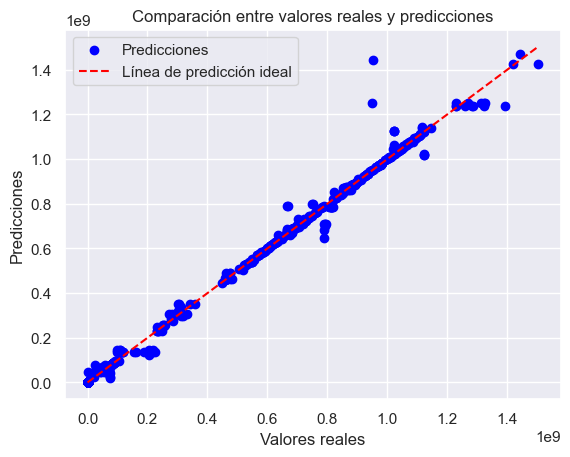

In [82]:
# Graficar las predicciones vs los valores reales
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea de predicción ideal')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre valores reales y predicciones")
plt.legend()
plt.show()

#### plotly.express valores reales y predicciones

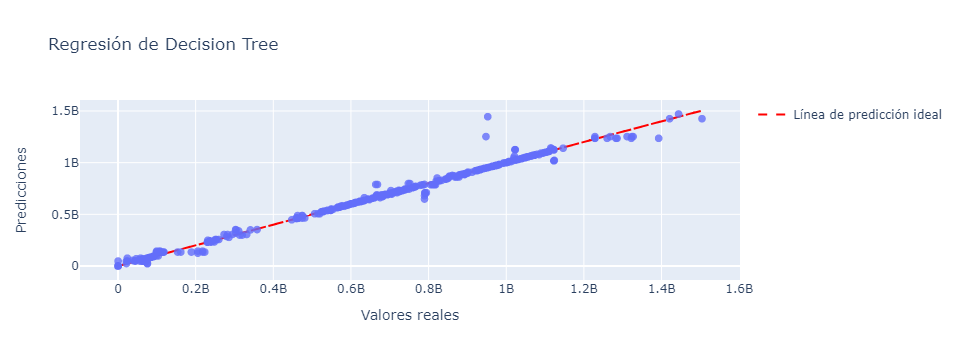

In [84]:
import plotly.express as px
import plotly.graph_objects as go  # Importar el módulo go de Plotly

# Crear un DataFrame con los datos reales y las predicciones
df_results = pd.DataFrame({'Real': y_test, 'Predicciones': y_pred})

# Graficar la regresión con Plotly Express
fig = px.scatter(df_results, x='Real', y='Predicciones', title='Regresión de Decision Tree',
                 labels={'Real': 'Valores reales', 'Predicciones': 'Predicciones'})
fig.update_traces(marker=dict(size=8, opacity=0.8))

# Agregar una línea de predicción ideal
fig.add_trace(go.Scatter(x=df_results['Real'], y=df_results['Real'], mode='lines',
                         name='Línea de predicción ideal', line=dict(color='red', dash='dash')))
fig.show()

#### Top 10 Caracteristicas mas importantes

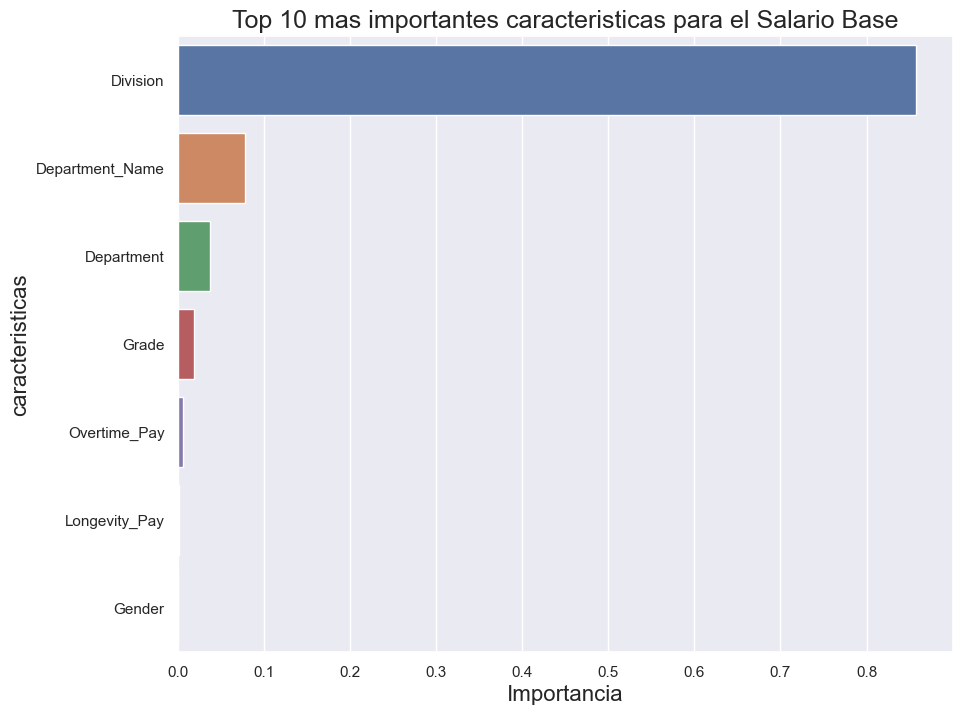

In [86]:
imp_df = pd.DataFrame({
    "Caracteristicas": X_test.columns,
    "Importancia": dtree.feature_importances_
})

fi = imp_df.sort_values(by='Importancia', ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importancia', y='Caracteristicas')
plt.title('Top 10 mas importantes caracteristicas para el Salario Base', fontsize=18)
plt.xlabel('Importancia', fontsize=16)
plt.ylabel('caracteristicas', fontsize=16)
plt.show()

#### Escenarios de Predicción

In [88]:
# Crear el DataFrame de ejemplo
datos_ejemplo = {
    'Department': [0, 1, 2, 3],
    'Department_Name': [0, 1, 2, 3], 
    'Division': [0, 1, 3, 4],
    'Gender': [1, 0, 1, 0],
    'Overtime_Pay': [0.0, 0.0, 0.0, 0.0],
    'Longevity_Pay': [0.0, 0.0, 0.0, 0.0],
    'Grade': [55, 56, 11, 6],         
}

df_ejemplo = pd.DataFrame(datos_ejemplo)

# Realizar la predicción utilizando el modelo entrenado
predicciones = dtree.predict(df_ejemplo)

# Mostrar las predicciones de salarios base
print(f"Predicciones de salarios base: {predicciones}")

Predicciones de salarios base: [1.84717304e+09 9.45086813e+08 1.22842001e+09 9.44619857e+08]


**Conlusión:**
Elaboramos un ejemplos de predicciones sobre 4 trabajadores con las siguientes condiciones.

**Trabajador 1:**  
- Department: ABS
- Department_Name: Alcohol Beverage Services
- Division: ABS 85 Administration
- Gender: Masculino
- Overtime_Pay: 0
- Longevity_Pay: 0
- Grade: N19
- Base_Salary: 1,847,040,900

**Trabajador 2:**
- Department: BOA
- Department_Name: Board of Appeals Department
- Division: ABS 85 Administrative Services
- Gender: Femenino
- Overtime_Pay: 0
- Longevity_Pay: 0
- Grade: T2
- Base_Salary: 1,444,938,280

**Trabajador 3:**
- Department: BOE
- Department_Name: Board of Elections
- Division: ABS 85 Beer Delivery Operations
- Gender: Masculino
- Overtime_Pay: 0
- Longevity_Pay: 0
- Grade: 10
- Base_Salary: 953,856,518 

**Trabajador 4:**
- Department: CAT
- Department_Name: County Attorney's Office
- Division: ABS 85 Beer Warehouse Operations
- Gender: Femenino
- Overtime_Pay: 0
- Longevity_Pay: 0
- Grade: N25
- Base_Salary: 1,537,401,810 

### LinearRegression

In [91]:
from sklearn.linear_model import LinearRegression
# Definir el modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [92]:
a_pred = lr.predict(X_test)
a_pred

array([ 7.36504476e+07,  6.53256857e+08,  5.47312279e+07, ...,
        6.30610278e+07, -5.23486937e+07,  1.27195679e+08])

#### $$R^2$$ R cuadrado Score

In [94]:
from sklearn.metrics import r2_score
score_lr = r2_score(a_pred,y_test)
score_lr

0.5646785656814879

In [95]:
from sklearn.metrics import mean_squared_error
a = lr.predict(X_test)
print("RMSE for LinearRegression:", np.sqrt(mean_squared_error(y_test, a_pred)))

RMSE for LinearRegression: 203486865.81599787


#### Métricas de Regresión

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("Error Cuadrático Medio:", (mean_squared_error(y_test, a_pred)))
print("Error Absoluto Medio:", (mean_absolute_error(y_test, a_pred)))
print("R-cuadrado:", (r2_score(y_test, a_pred)))

Error Cuadrático Medio: 4.140690455961792e+16
Error Absoluto Medio: 139898863.07177496
R-cuadrado: 0.5692859956657912


**Conclusiones:**

Intentando mejorar las predicciones con un modelo de regresión lineal; identificamos que este modelo no predice mejor que el modelo DecisionTreeRegression, Según las métricas regresión: 

- El **MSE** = 4.140690455961792e+16 es extremadamente alto, lo que sugiere que tu modelo está teniendo dificultades para ajustarse a los datos. Un MSE tan grande indica que hay una gran dispersión entre las predicciones del modelo y los valores reales. Puede ser que el modelo esté sobre ajustando los datos, o que los datos en sí mismos sean muy ruidosos.

- El **MAE** también es muy alto, lo que significa que las predicciones del modelo tienden a desviarse significativamente del valor real, en promedio, en 139,898,863 unidades.

- El **R-cuadrado** indica cuánta variabilidad en la variable objetivo es explicada por el modelo. Un valor de 0.57 significa que aproximadamente el 57% de la variabilidad en la variable objetivo puede ser explicada por las características incluidas en el modelo.



#### Gráfico valores reales y predicciones

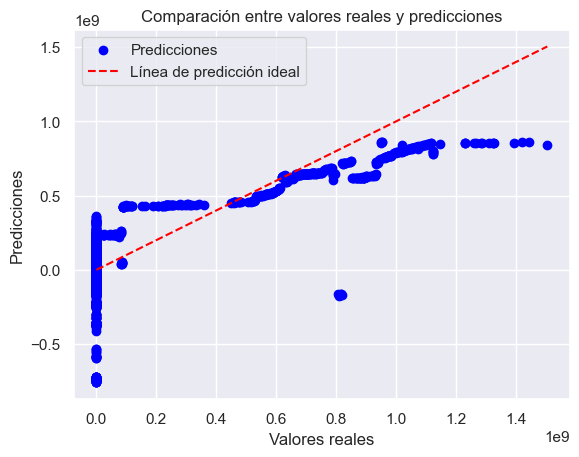

In [100]:
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba
a_pred = lr.predict(X_test)

# Graficar las predicciones vs los valores reales
plt.scatter(y_test, a_pred, color='blue', label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea de predicción ideal')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre valores reales y predicciones")
plt.legend()
plt.show()

#### plotly.express valores reales y predicciones

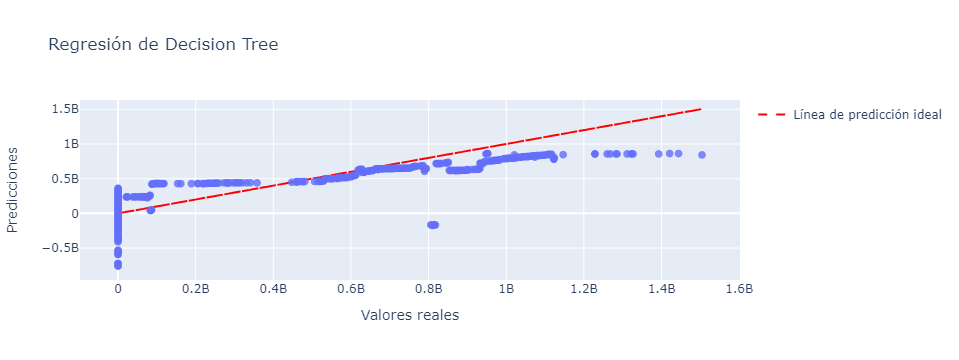

In [102]:
import plotly.express as px
import plotly.graph_objects as go  # Importar el módulo go de Plotly

# Crear un DataFrame con los datos reales y las predicciones
df_results = pd.DataFrame({'Real': y_test, 'Predicciones': a_pred})

# Graficar la regresión con Plotly Express
fig = px.scatter(df_results, x='Real', y='Predicciones', title='Regresión de Decision Tree',
                 labels={'Real': 'Valores reales', 'Predicciones': 'Predicciones'})
fig.update_traces(marker=dict(size=8, opacity=0.8))

# Agregar una línea de predicción ideal
fig.add_trace(go.Scatter(x=df_results['Real'], y=df_results['Real'], mode='lines',
                         name='Línea de predicción ideal', line=dict(color='red', dash='dash')))
fig.show()

**Conclusión:** 

En la gráfica de comparación de los valores reales con versus la línea de predicción, podemos notar que el modelo de regresión lineal no logra predecir ni acercarse a la línea de predicción, por lo tanto, este no es un modelo que elegiríamos para hacer pruebas de lo que sucederá con los salarios de las personas del condado de Montgomery en el futuro.